In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Master010419v3.csv')

/Users/epetenko/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (20,31,32,33,35,36,37,38,39,40,41,42,43,45,46,48,49,50,68,83,84,85,86,87,88,89,90,91,92,93,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,﻿ï»¿id,Timestamp,Date_inputted,County,Town,Town_county,File_name,Case_report_no,Incident_date,Incident_time,...,Subject_3_charges_clean,Subject_3_force_nature,Subject_3_injured,Subject_3_hosp,Subject_3_killed,Subject_3_photo,Is_second,Is_third,Subject_2_force_nature_clean,Subject_3_force_nature_clean
0,0,6/7/18 6:04,6/8/18,Union County,Springfield,"Springfield, Union County",SPRINGFIELD-UNION-UOF-2012-2016,I-2012-002796,4/14/12,7:46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,1,6/7/18 6:17,6/8/18,Union County,Springfield,"Springfield, Union County",SPRINGFIELD-UNION-UOF-2012-2016,I-2012-009250,10/2/12,4:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
2,2,6/7/18 6:23,6/8/18,Union County,Springfield,"Springfield, Union County",SPRINGFIELD-UNION-UOF-2012-2016,I-2013-000011,1/1/13,1:39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,3,6/7/18 6:32,6/8/18,Union County,Springfield,"Springfield, Union County",SPRINGFIELD-UNION-UOF-2012-2016,I-2013-004131,4/19/13,11:59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,4,6/7/18 6:39,6/8/18,Union County,Springfield,"Springfield, Union County",SPRINGFIELD-UNION-UOF-2012-2016,I-2013-004131,4/19/13,10:51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70405 entries, 0 to 70404
Data columns (total 100 columns):
﻿ï»¿id                          70405 non-null int64
Timestamp                       70272 non-null object
Date_inputted                   70244 non-null object
County                          70405 non-null object
Town                            70405 non-null object
Town_county                     70405 non-null object
File_name                       70362 non-null object
Case_report_no                  70401 non-null object
Incident_date                   70405 non-null object
Incident_time                   70405 non-null object
Location_city                   22416 non-null object
Location_detail                 70404 non-null object
Incident_type                   69785 non-null object
Incident_EDP                    5483 non-null object
Officer_1_first                 70405 non-null object
officer_1_middle                29530 non-null object
Officer_1_last              

### Prep columns: Incident key and years

In [6]:
# df.Case_report_no = df.Case_report_no.astype(str)
# df.Incident_date = df.Incident_date.astype(str)
df['Incident_key'] = df['Town_county'] + ', ' + df.Case_report_no + ', ' + df.Incident_date

In [7]:
df.Incident_date.unique()

array(['4/14/12', '10/2/12', '1/1/13', ..., 'XX/03/2015', '1/14/13 0:00',
       '3/31/15 0:00'], dtype=object)

In [8]:
df['Year'] = df.Incident_date.str.split(pat='/', expand=True)[2]
df['Month'] = df.Incident_date.str.split(pat='/', expand=True)[0]


df.Year = df.Year.replace(to_replace='12', value='2012')
df.Year = df.Year.replace(to_replace='13', value='2013')
df.Year = df.Year.replace(to_replace='14', value='2014')
df.Year = df.Year.replace(to_replace='15', value='2015')
df.Year = df.Year.replace(to_replace='16', value='2016')

df.Year = df.Year.replace(to_replace='12 0:00', value='2012')
df.Year = df.Year.replace(to_replace='13 0:00', value='2013')
df.Year = df.Year.replace(to_replace='14 0:00', value='2014')
df.Year = df.Year.replace(to_replace='15 0:00', value='2015')
df.Year = df.Year.replace(to_replace='16 0:00', value='2016')
df.Year = df.Year.replace(to_replace=' 00:00:00', value='')


In [9]:
df.Year.unique()

array(['2012', '2013', '2014', '2015', '2016', None, 'XXXX'], dtype=object)

## Incident totals:

#### Total uses of force 2012-2016:

In [10]:
df.Incident_key.count()

70401

In [12]:
df.Timestamp.count()

70272

#### Total uses of force by year:

In [13]:
df.pivot_table(index='Year', values='Incident_key', aggfunc=len)

Year
2012    13263
2013    13951
2014    14156
2015    14106
2016    14789
XXXX       21
Name: Incident_key, dtype: int64

#### Incidents 2012-2016 and by year:

In [14]:
print 'Unique incidents, 2012-2016:', df['Incident_key'].nunique()

Unique incidents, 2012-2016: 43629


In [15]:
by_year = df.pivot_table(index='Year', values='Incident_key', aggfunc=lambda x: len(x.unique()))

by_year

Year
2012    8743
2013    8785
2014    8775
2015    8495
2016    8725
XXXX      17
Name: Incident_key, dtype: int64

### Subject race

In [16]:
subj_race = pd.DataFrame(df.pivot_table(index='Subject_1_race', values='Incident_key', aggfunc=lambda x: len(x.unique())))
subj_race['Percent'] = subj_race['Incident_key'] / subj_race['Incident_key'].sum()
subj_race

,Incident_key,Percent
Subject_1_race,,
REDACTED,2,0.000045
asian,272,0.006119
asian/pacific islander,118,0.002655
black,17453,0.392635
blank,1,0.000022
canine,5,0.000112
hispanic,4451,0.100133
illegible,18,0.000405
mixed,4,0.000090


##  Arrest rates

#### Read in arrest dataset

In [17]:
spreadsheet_id = "1rd5K7MKdFnoFxIaAVF9LVT9J_EZA1HmRRxKm_ZF_ub8"
to_pre = pd.read_csv("https://docs.google.com/spreadsheets/d/" + spreadsheet_id + "/export?format=csv")

In [18]:
to_pre.head()

,AGENCY,STNAME,ORI,Invensis_county,Invensis_town,Invensis_town_county,TOTAL_ARRESTS_2012,TOTAL_ARRESTS_2013,TOTAL_ARRESTS_2014,TOTAL_ARRESTS_2015,...,AIAN_PERCENT_ARRESTS_2012,AIAN_PERCENT_ARRESTS_2013,AIAN_PERCENT_ARRESTS_2014,AIAN_PERCENT_ARRESTS_2015,AIAN_PERCENT_ARRESTS_2016,API_PERCENT_ARRESTS_2012,API_PERCENT_ARRESTS_2013,API_PERCENT_ARRESTS_2014,API_PERCENT_ARRESTS_2015,API_PERCENT_ARRESTS_2016
0,ABERDEEN TOWNSHIP,N J,NJ01330,Monmouth County,Aberdeen,"Aberdeen, Monmouth County",617.0,575.0,584.0,626.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.972447,1.913043,0.513699,1.597444,1.286765
1,ABSECON,N J,NJ00101,Atlantic County,Absecon,"Absecon, Atlantic County",355.0,384.0,291.0,228.0,...,0.845070,0.781250,0.000000,0.000000,0.000000,0.000000,1.041667,2.405498,1.315789,1.606426
2,ALLENDALE,N J,NJ00201,Bergen County,Allendale,"Allendale, Bergen County",82.0,84.0,103.0,105.0,...,3.658537,2.380952,1.941748,0.952381,1.176471,1.219512,0.000000,0.970874,4.761905,8.235294
3,ALLENHURST,N J,NJ01301,Monmouth County,Allenhurst,"Allenhurst, Monmouth County",141.0,152.0,135.0,116.0,...,0.000000,1.315789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ALLENTOWN,N J,NJ01302,Monmouth County,Allentown,"Allentown, Monmouth County",20.0,32.0,64.0,37.0,...,0.000000,3.125000,1.562500,0.000000,0.000000,0.000000,3.125000,0.000000,0.000000,0.000000


#### Total arrests, and by year:

In [19]:
ar = to_pre[['TOTAL_ARRESTS_2012', 'TOTAL_ARRESTS_2013', 'TOTAL_ARRESTS_2014', 
       'TOTAL_ARRESTS_2015', 'TOTAL_ARRESTS_2016']].sum()

ar

TOTAL_ARRESTS_2012    292861.0
TOTAL_ARRESTS_2013    278472.0
TOTAL_ARRESTS_2014    270359.0
TOTAL_ARRESTS_2015    257809.0
TOTAL_ARRESTS_2016    262737.0
dtype: float64

In [20]:
tot_arrests = ar.sum()

#### Non-edp incidents by year

In [21]:
all_UOF_data_no_blank_charges = df[(df['Incident_EDP'] != 'EDP') & (df['Subject_1_charges_raw'] != 'EDP/MEDICAL')  | (df['Subject_1_charges_raw'] != 'BLANK')]

year_nedp = all_UOF_data_no_blank_charges.pivot_table(index='Year', values='Incident_key', aggfunc=lambda x: len(x.unique()))
year_nedp

Year
2012    8439
2013    8450
2014    8378
2015    8051
2016    8119
XXXX      16
Name: Incident_key, dtype: int64

### Incidents per arrest:

In [22]:
print "Incidents per 1,000 arrests", (float(all_UOF_data_no_blank_charges.Incident_key.nunique()) / tot_arrests ) * 1000

Incidents per 1,000 arrests 30.4939371828


In [23]:
print "Incidents per 1,000 arrests 2012:", (8439 / 284206.0 ) * 1000
print "Incidents per 1,000 arrests 2013:", (8450 / 270867.0 ) * 1000
print "Incidents per 1,000 arrests 2014:", (8378 / 261662.0 ) * 1000
print "Incidents per 1,000 arrests 2015:", (8051 / 250233.0 ) * 1000
print "Incidents per 1,000 arrests 2016:", (8119 / 255830.0) * 1000

Incidents per 1,000 arrests 2012: 29.6932506703
Incidents per 1,000 arrests 2013: 31.1961220821
Incidents per 1,000 arrests 2014: 32.0184054238
Incidents per 1,000 arrests 2015: 32.1740138191
Incidents per 1,000 arrests 2016: 31.7359183833


In [24]:
race_piv = pd.DataFrame(df.pivot_table(index='Subject_1_race', values='Incident_key', aggfunc=lambda x: len(x.unique())))

race_piv['Percent of total'] = (race_piv['Incident_key'] / race_piv.Incident_key.sum(axis=0)) * 100

race_piv


,Incident_key,Percent of total
Subject_1_race,,
REDACTED,2,0.004499
asian,272,0.611910
asian/pacific islander,118,0.265461
black,17453,39.263459
blank,1,0.002250
canine,5,0.011248
hispanic,4451,10.013273
illegible,18,0.040494
mixed,4,0.008999


In [25]:
race_nedp = pd.DataFrame(all_UOF_data_no_blank_charges.pivot_table(index='Subject_1_race', values='Incident_key', aggfunc=lambda x: len(x.unique())))

race_nedp['Percent of total'] = (race_nedp['Incident_key'] / race_nedp.Incident_key.sum(axis=0)) * 100

race_nedp


,Incident_key,Percent of total
Subject_1_race,,
REDACTED,2,0.004725
asian,250,0.590626
asian/pacific islander,111,0.262238
black,16975,40.103478
blank,1,0.002363
canine,5,0.011813
hispanic,4305,10.170573
illegible,17,0.040163
mixed,4,0.009450


In [26]:
wh_arrests = to_pre[[u'TOTAL_WHITE_ARRESTS_2012', u'TOTAL_WHITE_ARRESTS_2013',
       u'TOTAL_WHITE_ARRESTS_2014', u'TOTAL_WHITE_ARRESTS_2015',
       u'TOTAL_WHITE_ARRESTS_2016']].sum().sum()

bl_arrests = to_pre[[u'TOTAL_BLACK_ARRESTS_2012',
       u'TOTAL_BLACK_ARRESTS_2013', u'TOTAL_BLACK_ARRESTS_2014',
       u'TOTAL_BLACK_ARRESTS_2015', u'TOTAL_BLACK_ARRESTS_2016']].sum().sum()

hi_arrests = 0

api_arrests = to_pre[[u'TOTAL_API_ARRESTS_2013', u'TOTAL_API_ARRESTS_2014',
       u'TOTAL_API_ARRESTS_2015', u'TOTAL_API_ARRESTS_2016']].sum().sum()

aian_arrests = to_pre[[  u'TOTAL_AIAN_ARRESTS_2012', u'TOTAL_AIAN_ARRESTS_2013',
       u'TOTAL_AIAN_ARRESTS_2014', u'TOTAL_AIAN_ARRESTS_2015',
       u'TOTAL_AIAN_ARRESTS_2016']].sum().sum()


In [27]:
print 'White people percent of arrests: ', wh_arrests / tot_arrests * 100
print 'Black people percent of arrests: ', bl_arrests / tot_arrests * 100
print 'Hispanic people percent of arrests: ', hi_arrests / tot_arrests * 100
print 'API people percent of arrests: ', api_arrests / tot_arrests * 100
print 'AIAN people percent of arrests: ', aian_arrests / tot_arrests * 100


White people percent of arrests:  60.3204432706
Black people percent of arrests:  37.7711530584
Hispanic people percent of arrests:  0.0
API people percent of arrests:  1.14231140227
AIAN people percent of arrests:  0.16260007429


In [28]:
# Read in Census summary because some of the pop data appeared to be messed up in the arrests file (prob. NJSP)
pop_df = pd.read_csv('Data_sources/Race_pop/ACS_16_5YR_B03002_with_ann.csv', skiprows=1)


In [29]:
tot_pop = float(pop_df['Estimate; Total:'].sum())
wh_pop = float(pop_df['Estimate; Not Hispanic or Latino: - White alone'].sum())
bl_pop = float(pop_df['Estimate; Not Hispanic or Latino: - Black or African American alone'].sum())
hi_pop = float( pop_df['Estimate; Hispanic or Latino:'].sum())
api_pop = float( pop_df['Estimate; Not Hispanic or Latino: - Asian alone'].sum() + pop_df['Estimate; Not Hispanic or Latino: - Native Hawaiian and Other Pacific Islander alone'].sum())
aian_pop = float( pop_df['Estimate; Not Hispanic or Latino: - American Indian and Alaska Native alone'].sum())


In [30]:
print 'White people percent of population:', (wh_pop / tot_pop) * 100
print 'Black people percent of population:', (bl_pop / tot_pop) * 100
print 'Hispanic people percent of population:', (hi_pop / tot_pop) * 100
print 'API people percent of population:', (api_pop / tot_pop) * 100
print 'AIAN people percent of population:', (aian_pop / tot_pop) * 100


White people percent of population: 56.6949239613
Black people percent of population: 12.7185642552
Hispanic people percent of population: 19.2904434725
API people percent of population: 9.15246511227
AIAN people percent of population: 0.106657472147


In [31]:
print "Black - white population odds ratio:" , ((race_piv.loc[['black'], 
                                                              ['Incident_key']].Incident_key.sum() / bl_pop) / (race_piv.loc[['white'],
                                                                                                                             ['Incident_key']].Incident_key.sum() / wh_pop))


Black - white population odds ratio: 3.69716235416


In [32]:
# excluded EDPs
print "Black - white arrests odds ratio:" , ((race_nedp.loc[['black'], 
                                                              ['Incident_key']].Incident_key.sum() / bl_arrests) / (race_nedp.loc[['white'],
                                                                                                                             ['Incident_key']].Incident_key.sum() / wh_arrests))


Black - white arrests odds ratio: 1.38029711699


## Officer statistics

#### Total number of unique officers:

In [33]:
df.officerid.nunique()

17369

#### Incidents per officer, on average:

In [34]:
float(df.Incident_key.count()) / df.officerid.nunique()

4.053255800564224

#### Officer racial breakdown

In [35]:
offrace = pd.DataFrame(df.pivot_table(index='Officer_1_race', values='Incident_key', aggfunc=len))
offrace['Percent'] = (offrace.Incident_key / offrace.Incident_key.sum(axis=0)) * 100
offrace

,Incident_key,Percent
Officer_1_race,,
asian,530,0.752787
asian/pacific islander,120,0.170442
black,4457,6.330516
black/white,2,0.002841
hispanic,3981,5.654428
illegible,23,0.032668
mixed,27,0.038350
native american,7,0.009942
not listed,19144,27.191251


## Top officers


In [36]:
df['MonthYear'] = df.Month + "/" + df.Year

In [37]:
# short_df = df[(df.Year != '2012') & (df.MonthYear != '1/2013') & (df.MonthYear  != '01/2013')]

In [38]:
#basic list of top officers
top_off_start = pd.DataFrame(df.officerid.value_counts().head(30))
top_off_start = top_off_start.rename(columns={'officerid':'Number of incidents for this officer'})
top_off_start.head()

,Number of incidents for this officer
ScottMSendrickAtlanticCity,62
JamesDayVineland,59
JosephDixonMillville,58
RyanPDuffyPaterson,57
PatrickJoyceLongBranch,52


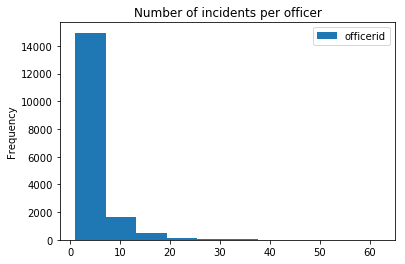

In [39]:
pd.DataFrame(df.officerid.value_counts()).plot(kind='hist',title='Number of incidents per officer')

In [40]:
#got rid of MIs cause they were throwing first names off
df.Officer_1_first = df.Officer_1_first.str.split(pat=' ', expand=True)[0]

#then created pivot table of info you're looking for
all_off = pd.DataFrame(df.pivot_table(index=['officerid', 'Officer_1_first', 'Officer_1_last', 'Officer_1_rank', 
                               'Officer_1_race', 'Town_county'], values='Incident_key', aggfunc=len)).reset_index()

all_off = all_off.rename(columns={'Incident_key': 'Rows with this data'})

In [41]:
#merge em
top_off_all = top_off_start.merge(all_off, how='left', left_index=True, right_on='officerid')

In [42]:
#Pivot table of department totals
town_county_piv = pd.DataFrame(df.pivot_table(index='Town_county', values='Incident_key', aggfunc=lambda x: len(x.unique())))
town_county_piv = town_county_piv.rename(columns={'Incident_key': 'Department_incidents'})

In [43]:
top_off = top_off_all.merge(town_county_piv, how='left', left_on='Town_county', right_index=True)

top_off['Percent of department'] = (top_off['Number of incidents for this officer'] / top_off['Department_incidents']) * 100

In [44]:
top_off.head()

,Number of incidents for this officer,officerid,Officer_1_first,Officer_1_last,Officer_1_rank,Officer_1_race,Town_county,Rows with this data,Department_incidents,Percent of department
19740,62,ScottMSendrickAtlanticCity,Scott,Sendrick,Ofc.,not listed,"Atlantic City, Atlantic County",4,1668,3.717026
19741,62,ScottMSendrickAtlanticCity,Scott,Sendrick,Ofc.,white,"Atlantic City, Atlantic County",58,1668,3.717026
8546,59,JamesDayVineland,James,Day,Ofc.,white,"Vineland, Cumberland County",59,916,6.441048
11168,58,JosephDixonMillville,Joseph,Dixon,Ofc.,not listed,"Millville, Cumberland County",58,454,12.775330
19367,57,RyanPDuffyPaterson,R,Duffy,Ofc.,not listed,"Paterson, Passaic County",1,1466,3.888131


### Subjects injuried

In [45]:
subj_inj = pd.DataFrame(df.pivot_table(index='Subject_1_injured', values='Incident_key', aggfunc=lambda x: len(x.unique())))

In [46]:
print 'Subjects percent injured: ',  float(subj_inj.loc[['yes'], ['Incident_key']].Incident_key.sum() )/  subj_inj.Incident_key.sum(axis=0)

Subjects percent injured:  0.207828559912


### Subjects hospitalized

In [47]:
subj_hosp = pd.DataFrame(df.pivot_table(index='Subject_1_hosp', values='Incident_key', aggfunc=lambda x: len(x.unique())))

print 'Subjects percent hospitalized: ',  float(subj_hosp.loc[['yes'], ['Incident_key']].Incident_key.sum() )/ subj_hosp.Incident_key.sum(axis=0)

Subjects percent hospitalized:  0.0992188384467


In [48]:
subj_hosp

,Incident_key
Subject_1_hosp,
No,1
no,10788
not listed,28990
redacted,4
yes,4382


### Officers injured

In [49]:
off_inj = pd.DataFrame(df.pivot_table(index='Officer_1_injured', values='Incident_key', aggfunc=lambda x: len(x.unique())))

print 'Officers percent injured: ',  float(off_inj.loc[['yes'], ['Incident_key']].Incident_key.sum() )/ off_inj.Incident_key.sum(axis=0)

Officers percent injured:  0.118361739578


### Officers hospitalized

In [50]:
off_hosp = pd.DataFrame(df.pivot_table(index='Officer_1_hosp', values='Incident_key', aggfunc=lambda x: len(x.unique())))

print 'Officers percent hospitalized: ',  float(off_hosp.loc[['yes'], ['Incident_key']].Incident_key.sum() )/ off_hosp.Incident_key.sum(axis=0)

Officers percent hospitalized:  0.0237445599477
